In [1]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f"File uploaded: {filename}")

Saving Car details v3.csv to Car details v3.csv
File uploaded: Car details v3.csv


In [2]:
import pandas as pd
df = pd.read_csv("Car details v3.csv")

In [3]:
df.shape

(8128, 13)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
categories = ["fuel", "transmission", "owner", "seller_type"]

for col in categories:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()

Unique values in 'fuel':
['Diesel' 'Petrol' 'LPG' 'CNG']

Unique values in 'transmission':
['Manual' 'Automatic']

Unique values in 'owner':
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']

Unique values in 'seller_type':
['Individual' 'Dealer' 'Trustmark Dealer']



In [7]:
categories = ["fuel", "transmission", "owner", "seller_type"]
for column in categories:
    df[column] = df[column].astype("category")

In [8]:
df["fuel"].cat.categories

Index(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype='object')

In [9]:
df["fuel"].cat.codes

,0
0,1
1,1
2,3
3,1
4,3
...,...
8123,3
8124,1
8125,1
8126,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           8128 non-null   object  
 1   year           8128 non-null   int64   
 2   selling_price  8128 non-null   int64   
 3   km_driven      8128 non-null   int64   
 4   fuel           8128 non-null   category
 5   seller_type    8128 non-null   category
 6   transmission   8128 non-null   category
 7   owner          8128 non-null   category
 8   mileage        7907 non-null   object  
 9   engine         7907 non-null   object  
 10  max_power      7913 non-null   object  
 11  torque         7906 non-null   object  
 12  seats          7907 non-null   float64 
dtypes: category(4), float64(1), int64(3), object(5)
memory usage: 604.0+ KB


In [11]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [12]:
df["car_brand_name"] = df["name"].str.split().str[0].astype("category")
df["engine"] = df["engine"].str.split().str[0].astype("float")
df["mileage"] = df["mileage"].str.split().str[0].astype("float")
df["max_power"] = df["max_power"].astype(str).str.extract(r'(\d+\.?\d*)').astype("float")

In [13]:
import datetime
df["car_age"] = (datetime.datetime.now().year) - (df["year"])

In [14]:
df.drop(["name", "year", "torque"], axis = 1, inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   selling_price   8128 non-null   int64   
 1   km_driven       8128 non-null   int64   
 2   fuel            8128 non-null   category
 3   seller_type     8128 non-null   category
 4   transmission    8128 non-null   category
 5   owner           8128 non-null   category
 6   mileage         7907 non-null   float64 
 7   engine          7907 non-null   float64 
 8   max_power       7912 non-null   float64 
 9   seats           7907 non-null   float64 
 10  car_brand_name  8128 non-null   category
 11  car_age         8128 non-null   int64   
dtypes: category(5), float64(4), int64(3)
memory usage: 486.3 KB


In [16]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,car_age
count,"8,128.00","8,128.00","7,907.00","7,907.00","7,912.00","7,907.00","8,128.00"
mean,"638,271.81","69,819.51",19.42,"1,458.63",91.52,5.42,11.20
std,"806,253.40","56,550.55",4.04,503.92,35.82,0.96,4.04
min,"29,999.00",1.00,0.00,624.00,0.00,2.00,5.00
25%,"254,999.00","35,000.00",16.78,"1,197.00",68.05,5.00,8.00
50%,"450,000.00","60,000.00",19.30,"1,248.00",82.00,5.00,10.00
75%,"675,000.00","98,000.00",22.32,"1,582.00",102.00,5.00,14.00
max,"10,000,000.00","2,360,457.00",42.00,"3,604.00",400.00,14.00,42.00


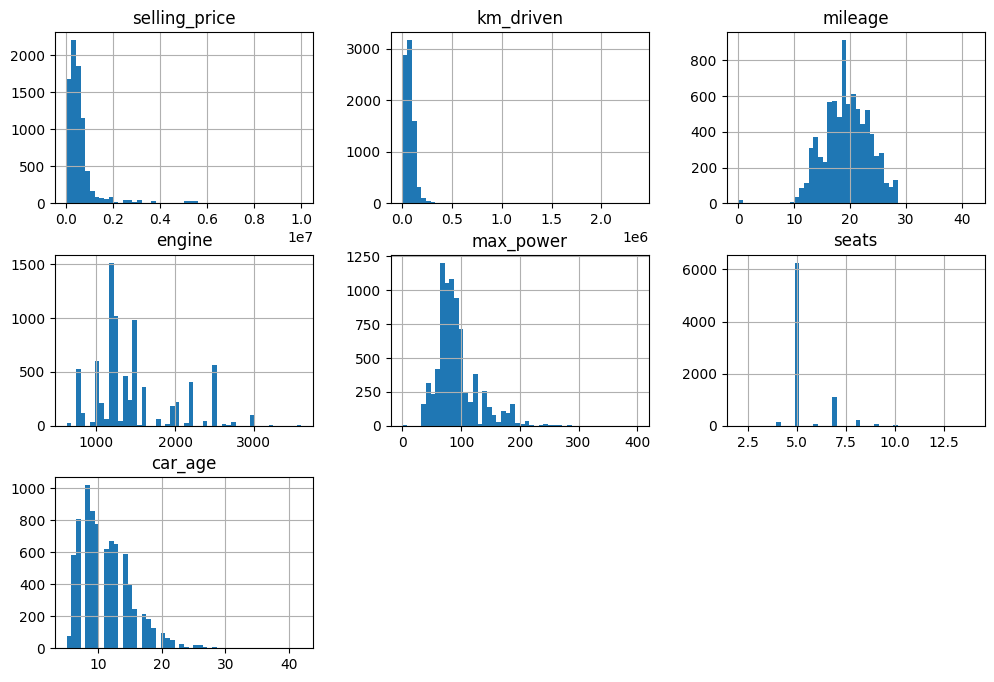

In [17]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(12, 8))
plt.show()

In [18]:
df.describe(include = "category")

,fuel,seller_type,transmission,owner,car_brand_name
count,8128,8128,8128,8128,8128
unique,4,3,2,5,32
top,Diesel,Individual,Manual,First Owner,Maruti
freq,4402,6766,7078,5289,2448


In [19]:
df_encoded = df.copy()

for col in df.select_dtypes(include=["category"]).columns:
    df_encoded[col] = df_encoded[col].cat.codes

In [20]:
df_encoded.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
0,450000,145500,1,1,1,0,23.40,"1,248.00",74.00,5.00,20,11
1,370000,120000,1,1,1,2,21.14,"1,498.00",103.52,5.00,27,11
2,158000,140000,3,1,1,4,17.70,"1,497.00",78.00,5.00,10,19
3,225000,127000,1,1,1,0,23.00,"1,396.00",90.00,5.00,11,15
4,130000,120000,3,1,1,0,16.10,"1,298.00",88.20,5.00,20,18


In [21]:
corr_matrix = df_encoded.corr()
print(corr_matrix["selling_price"].sort_values(ascending=False))

selling_price     1.00
max_power         0.75
engine            0.46
seats             0.04
car_brand_name   -0.09
mileage          -0.13
fuel             -0.19
km_driven        -0.23
owner            -0.23
seller_type      -0.34
car_age          -0.41
transmission     -0.59
Name: selling_price, dtype: float64


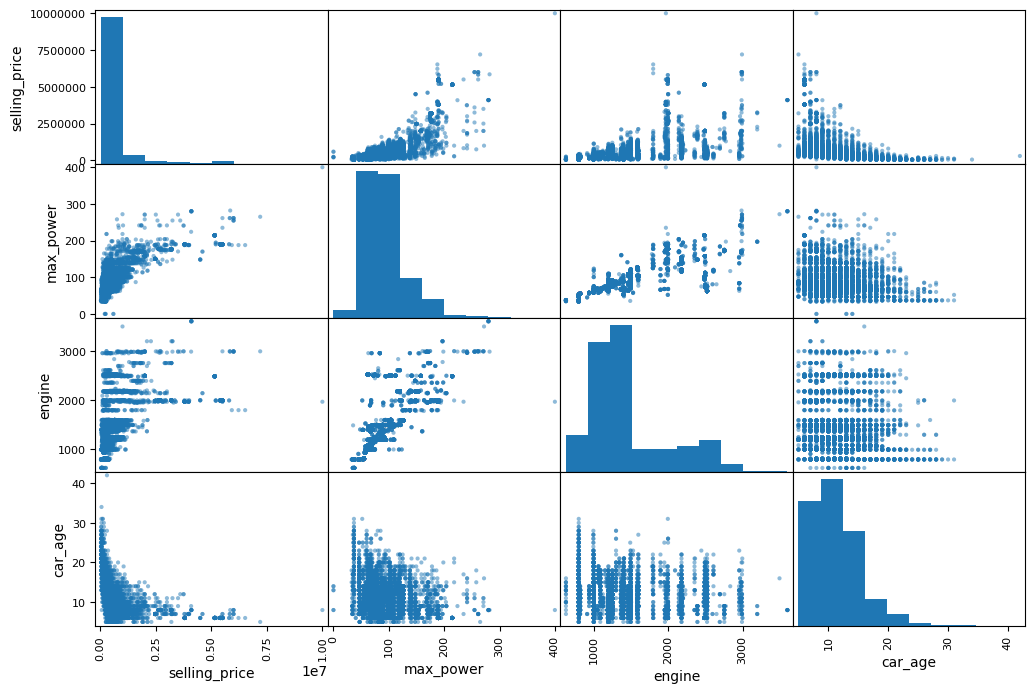

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["selling_price", "max_power", "engine",
              "car_age"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

In [25]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selling_price   8128 non-null   int64  
 1   km_driven       8128 non-null   int64  
 2   fuel            8128 non-null   int8   
 3   seller_type     8128 non-null   int8   
 4   transmission    8128 non-null   int8   
 5   owner           8128 non-null   int8   
 6   mileage         7907 non-null   float64
 7   engine          7907 non-null   float64
 8   max_power       7912 non-null   float64
 9   seats           7907 non-null   float64
 10  car_brand_name  8128 non-null   int8   
 11  car_age         8128 non-null   int64  
dtypes: float64(4), int64(3), int8(5)
memory usage: 484.3 KB


In [26]:
float_columns = [column for column in df_encoded.select_dtypes(["float"])]

for col in float_columns:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].median())

In [27]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selling_price   8128 non-null   int64  
 1   km_driven       8128 non-null   int64  
 2   fuel            8128 non-null   int8   
 3   seller_type     8128 non-null   int8   
 4   transmission    8128 non-null   int8   
 5   owner           8128 non-null   int8   
 6   mileage         8128 non-null   float64
 7   engine          8128 non-null   float64
 8   max_power       8128 non-null   float64
 9   seats           8128 non-null   float64
 10  car_brand_name  8128 non-null   int8   
 11  car_age         8128 non-null   int64  
dtypes: float64(4), int64(3), int8(5)
memory usage: 484.3 KB


In [28]:
df_encoded=pd.get_dummies(df_encoded, columns=['fuel','seller_type','transmission','owner','car_brand_name'], drop_first=True, dtype=int)


In [29]:
df_encoded.head()

,selling_price,km_driven,mileage,engine,max_power,seats,car_age,fuel_1,fuel_2,fuel_3,...,car_brand_name_22,car_brand_name_23,car_brand_name_24,car_brand_name_25,car_brand_name_26,car_brand_name_27,car_brand_name_28,car_brand_name_29,car_brand_name_30,car_brand_name_31
0,450000,145500,23.40,"1,248.00",74.00,5.00,11,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,370000,120000,21.14,"1,498.00",103.52,5.00,11,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,158000,140000,17.70,"1,497.00",78.00,5.00,19,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,225000,127000,23.00,"1,396.00",90.00,5.00,15,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,130000,120000,16.10,"1,298.00",88.20,5.00,18,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   selling_price      8128 non-null   int64  
 1   km_driven          8128 non-null   int64  
 2   mileage            8128 non-null   float64
 3   engine             8128 non-null   float64
 4   max_power          8128 non-null   float64
 5   seats              8128 non-null   float64
 6   car_age            8128 non-null   int64  
 7   fuel_1             8128 non-null   int64  
 8   fuel_2             8128 non-null   int64  
 9   fuel_3             8128 non-null   int64  
 10  seller_type_1      8128 non-null   int64  
 11  seller_type_2      8128 non-null   int64  
 12  transmission_1     8128 non-null   int64  
 13  owner_1            8128 non-null   int64  
 14  owner_2            8128 non-null   int64  
 15  owner_3            8128 non-null   int64  
 16  owner_4            8128 

In [31]:
X = df_encoded.drop("selling_price", axis=1)
y = df_encoded["selling_price"]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [33]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6502, 47)
x test:  (1626, 47)
y train:  (6502,)
y test:  (1626,)


In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 157291.05387462713
Root Mean Squared Error (RMSE): 290798.5799096718
R² Score: 0.8280777072258954


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def train_model(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    return model, X_test, y_test, y_pred

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_test, y_pred, log_transformed=False):
  if log_transformed:
      y_test = np.expm1(y_test)
      y_pred = np.expm1(y_pred)

  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  print(f"Mean Absolute Error (MAE): {mae:,.2f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
  print(f"R² Score: {r2:.4f}")

In [40]:
df.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,car_age
count,"8,128.00","8,128.00","7,907.00","7,907.00","7,912.00","7,907.00","8,128.00"
mean,"638,271.81","69,819.51",19.42,"1,458.63",91.52,5.42,11.20
std,"806,253.40","56,550.55",4.04,503.92,35.82,0.96,4.04
min,"29,999.00",1.00,0.00,624.00,0.00,2.00,5.00
25%,"254,999.00","35,000.00",16.78,"1,197.00",68.05,5.00,8.00
50%,"450,000.00","60,000.00",19.30,"1,248.00",82.00,5.00,10.00
75%,"675,000.00","98,000.00",22.32,"1,582.00",102.00,5.00,14.00
max,"10,000,000.00","2,360,457.00",42.00,"3,604.00",400.00,14.00,42.00


In [41]:
X = df_encoded.drop("selling_price", axis=1)

df_encoded['log_selling_price'] = np.log1p(df_encoded['selling_price'])
y = df_encoded['log_selling_price']

In [42]:
prices = [100000, 200000, 500000, 2000000, 8000000]
prices_array = np.array(prices)
log_values = np.log10(prices_array)
prices_df = pd.DataFrame({
        'Price (₹)': prices_array,
        'log10(Price)': log_values.round(2)
    })
print(prices_df)

   Price (₹)  log10(Price)
0     100000          5.00
1     200000          5.30
2     500000          5.70
3    2000000          6.30
4    8000000          6.90


In [43]:
model, X_test, y_test, y_pred = train_model(X, y)
evaluate_model(y_test, y_pred, log_transformed=True)

Mean Absolute Error (MAE): 106,467.73
Root Mean Squared Error (RMSE): 215,135.03
R² Score: 0.9294


In [44]:
df_encoded.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,car_age,fuel_1,fuel_2,fuel_3,...,car_brand_name_23,car_brand_name_24,car_brand_name_25,car_brand_name_26,car_brand_name_27,car_brand_name_28,car_brand_name_29,car_brand_name_30,car_brand_name_31,log_selling_price
count,"8,128.00","8,128.00","8,128.00","8,128.00","8,128.00","8,128.00","8,128.00","8,128.00","8,128.00","8,128.00",...,"8,128.00","8,128.00","8,128.00","8,128.00","8,128.00","8,128.00","8,128.00","8,128.00","8,128.00","8,128.00"
mean,"638,271.81","69,819.51",19.42,"1,452.90",91.26,5.41,11.20,0.54,0.00,0.45,...,0.01,0.00,0.00,0.03,0.01,0.09,0.06,0.02,0.01,12.97
std,"806,253.40","56,550.55",3.98,498.20,35.38,0.95,4.04,0.50,0.07,0.50,...,0.10,0.01,0.01,0.17,0.11,0.29,0.24,0.15,0.09,0.84
min,"29,999.00",1.00,0.00,624.00,0.00,2.00,5.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.31
25%,"254,999.00","35,000.00",16.80,"1,197.00",68.10,5.00,8.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.45
50%,"450,000.00","60,000.00",19.30,"1,248.00",82.00,5.00,10.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.02
75%,"675,000.00","98,000.00",22.28,"1,582.00",101.25,5.00,14.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.42
max,"10,000,000.00","2,360,457.00",42.00,"3,604.00",400.00,14.00,42.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,16.12
